In [26]:
import pandas as pd
dataset=pd.read_csv("/content/nation_level_daily.csv")

In [27]:
dataset

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0
...,...,...,...,...,...,...,...
185,02 August,52672,1804857,40355,1187261,760,38180
186,03 August,50488,1855345,43070,1230331,806,38986
187,04 August,51282,1906627,51220,1281551,849,39835
188,05 August,56626,1963253,45583,1327134,919,40754


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             190 non-null    object
 1   Daily Confirmed  190 non-null    int64 
 2   Total Confirmed  190 non-null    int64 
 3   Daily Recovered  190 non-null    int64 
 4   Total Recovered  190 non-null    int64 
 5   Daily Deceased   190 non-null    int64 
 6   Total Deceased   190 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 10.5+ KB


In [29]:
dataset.isnull().sum(axis = 0)

Date               0
Daily Confirmed    0
Total Confirmed    0
Daily Recovered    0
Total Recovered    0
Daily Deceased     0
Total Deceased     0
dtype: int64

In [30]:
data=[]
for i in range(0,190):
  string=str(dataset["Date"][i].split(" ")[0]) + "-"
  if(dataset["Date"][i].split(" ")[1]=="January"):
    string+=str(1)
  if(dataset["Date"][i].split(" ")[1]=="February"):
    string+=str(2)
  if(dataset["Date"][i].split(" ")[1]=="March"):
    string+=str(3)
  if(dataset["Date"][i].split(" ")[1]=="April"):
    string+=str(4)
  if(dataset["Date"][i].split(" ")[1]=="May"):
    string+=str(5)
  if(dataset["Date"][i].split(" ")[1]=="June"):
    string+=str(6)
  if(dataset["Date"][i].split(" ")[1]=="July"):
    string+=str(7)
  if(dataset["Date"][i].split(" ")[1]=="August"):
    string+=str(8)
  string+="-" + str(2020)
  data.append(string)



In [31]:
dataset['Date']=data

In [32]:
dataset

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30-1-2020,1,1,0,0,0,0
1,31-1-2020,0,1,0,0,0,0
2,01-2-2020,0,1,0,0,0,0
3,02-2-2020,1,2,0,0,0,0
4,03-2-2020,1,3,0,0,0,0
...,...,...,...,...,...,...,...
185,02-8-2020,52672,1804857,40355,1187261,760,38180
186,03-8-2020,50488,1855345,43070,1230331,806,38986
187,04-8-2020,51282,1906627,51220,1281551,849,39835
188,05-8-2020,56626,1963253,45583,1327134,919,40754


In [34]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [35]:
dataset

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-01-30,1,1,0,0,0,0
1,2020-01-31,0,1,0,0,0,0
2,2020-01-02,0,1,0,0,0,0
3,2020-02-02,1,2,0,0,0,0
4,2020-03-02,1,3,0,0,0,0
...,...,...,...,...,...,...,...
185,2020-02-08,52672,1804857,40355,1187261,760,38180
186,2020-03-08,50488,1855345,43070,1230331,806,38986
187,2020-04-08,51282,1906627,51220,1281551,849,39835
188,2020-05-08,56626,1963253,45583,1327134,919,40754


In [36]:
dataset.rename(columns = {'Daily Confirmed':'y'}, inplace = True)

In [37]:
dataset

,Date,y,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-01-30,1,1,0,0,0,0
1,2020-01-31,0,1,0,0,0,0
2,2020-01-02,0,1,0,0,0,0
3,2020-02-02,1,2,0,0,0,0
4,2020-03-02,1,3,0,0,0,0
...,...,...,...,...,...,...,...
185,2020-02-08,52672,1804857,40355,1187261,760,38180
186,2020-03-08,50488,1855345,43070,1230331,806,38986
187,2020-04-08,51282,1906627,51220,1281551,849,39835
188,2020-05-08,56626,1963253,45583,1327134,919,40754


In [38]:
from fbprophet import Prophet

In [39]:
model = Prophet()

In [42]:
dataset.rename(columns = {'Date':'ds'}, inplace = True)

In [43]:
dataset

,ds,y,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-01-30,1,1,0,0,0,0
1,2020-01-31,0,1,0,0,0,0
2,2020-01-02,0,1,0,0,0,0
3,2020-02-02,1,2,0,0,0,0
4,2020-03-02,1,3,0,0,0,0
...,...,...,...,...,...,...,...
185,2020-02-08,52672,1804857,40355,1187261,760,38180
186,2020-03-08,50488,1855345,43070,1230331,806,38986
187,2020-04-08,51282,1906627,51220,1281551,849,39835
188,2020-05-08,56626,1963253,45583,1327134,919,40754


In [44]:
model.fit(dataset)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
fut = model.make_future_dataframe(periods = 13, freq = 'M')

In [46]:
fut

,ds
0,2020-01-02
1,2020-01-03
2,2020-01-04
3,2020-01-05
4,2020-01-06
...,...
198,2021-08-31
199,2021-09-30
200,2021-10-31
201,2021-11-30


In [47]:
forecast = model.predict(fut)

In [48]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
198,2021-08-31,29981.659254,10484.814349,49188.379362,29081.662325,30890.816063,-402.451435,-402.451435,-402.451435,-402.451435,-402.451435,-402.451435,0.0,0.0,0.0,29579.207819
199,2021-09-30,31148.575088,10299.439809,47242.582621,30091.144845,32229.607379,-1824.657267,-1824.657267,-1824.657267,-1824.657267,-1824.657267,-1824.657267,0.0,0.0,0.0,29323.917821
200,2021-10-31,32354.388118,14543.327794,51153.338456,31107.757360,33603.135624,-556.096112,-556.096112,-556.096112,-556.096112,-556.096112,-556.096112,0.0,0.0,0.0,31798.292006
201,2021-11-30,33521.303953,15323.599531,50982.852954,32118.726184,34930.722812,-402.451435,-402.451435,-402.451435,-402.451435,-402.451435,-402.451435,0.0,0.0,0.0,33118.852518
202,2021-12-31,34727.116982,15061.888448,54143.909977,33115.147918,36311.252586,686.519260,686.519260,686.519260,686.519260,686.519260,686.519260,0.0,0.0,0.0,35413.636242


In [49]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
198,2021-08-31,29579.207819,10484.814349,49188.379362
199,2021-09-30,29323.917821,10299.439809,47242.582621
200,2021-10-31,31798.292006,14543.327794,51153.338456
201,2021-11-30,33118.852518,15323.599531,50982.852954
202,2021-12-31,35413.636242,15061.888448,54143.909977


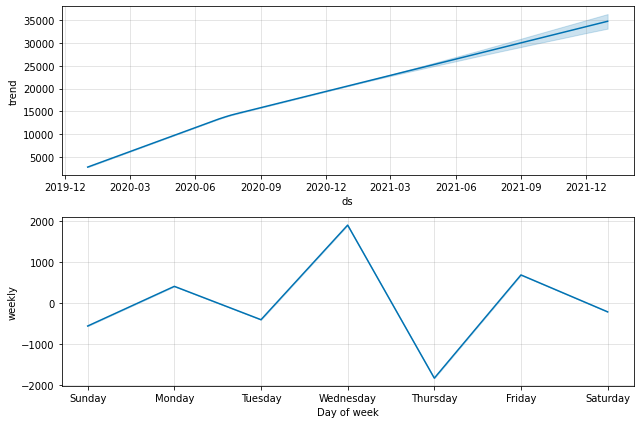

In [50]:
fig2 = model.plot_components(forecast)